In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from scipy.stats import skewtest, kurtosistest
# 日本語化対応
#import japanize_matplotlib
#%matplotlib notebook

# データの読み込み
file_path = "BarGraph_correlation_coefficient_for_trial-to-trial_comparison.csv"
df = pd.read_csv(file_path)


#%matplotlib notebook

In [3]:
df.head()

,No,Kp_1,Ki_1,Kd_1,|Kp|_1,Ki/|Kp|_1,Kd/|Kp|_1,Average number of shares purchased_1,Total number of shares purchased_1,Average stock price at time of purchase_1,...,Average stock price at time of purchase_4,Stock price range at time of purchase_4,Average stock price change rate at time of purchase_4,Average stock price change rate at time of purchase_2_4 days ago,Average number of shares sold_4,Total number of shares sold_4,Average stock price at time of sale_4,Stock price range at time of sale_4,Average stock price change rate at time of sale_4,Average stock price change rate at time of sale_2 days_4 ago
0,1,-0.082637,-0.006627,-0.001133,0.082637,-0.080194,-0.013711,20.833333,500,2207.600000,...,4498.600000,706,-7.480185,-8.641327,4.166667,100,5062.000,0,8.208636,8.000000
1,2,-0.288025,0.020760,-0.000657,0.288025,0.072077,-0.002281,79.166667,1900,2075.111111,...,4610.142857,808,-10.647825,-12.009461,83.333333,2000,5813.125,1798,16.190842,15.019241
2,3,-0.154286,-0.006566,0.000052,0.154286,-0.042557,0.000337,29.166667,700,2366.250000,...,4577.000000,408,-15.230556,-16.078372,29.166667,700,5697.800,1678,8.131216,8.072987
3,4,-0.118005,-0.021221,-0.007106,0.118005,-0.179831,-0.060218,108.333333,2600,2263.000000,...,4616.166667,808,-13.827142,-13.970503,50.000000,1200,6018.000,1798,18.288428,17.313800
4,5,-0.023689,0.016359,0.000351,0.023689,0.690574,0.014817,29.166667,700,2210.000000,...,4651.500000,624,-12.455246,-12.263887,12.500000,300,6014.000,1636,5.742273,5.829815


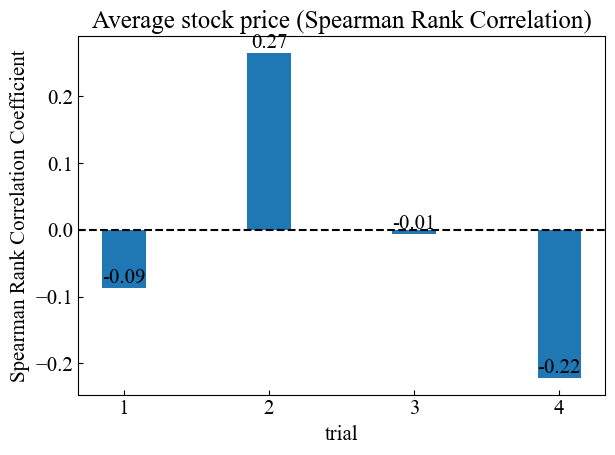

In [25]:
# 特定の列同士のSpearmanの順位相関係数を計算
correlation_values = [
    df['Average stock price at time of sale_1'].corr(df['Average stock price at time of purchase_1'], method='spearman'),
    df['Average stock price at time of sale_2'].corr(df['Average stock price at time of purchase_2'], method='spearman'),
    df['Average stock price at time of sale_3'].corr(df['Average stock price at time of purchase_3'], method='spearman'),
    df['Average stock price at time of sale_4'].corr(df['Average stock price at time of purchase_4'], method='spearman')
]

# グラフの作成
plt.bar(['1', '2', '3', '4'], correlation_values, width=0.3)
plt.xlabel('trial')
plt.ylabel('Spearman Rank Correlation Coefficient')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')
plt.title('Average stock price (Spearman Rank Correlation)')
plt.tight_layout()
plt.savefig("Spearman_Average_stock_price_p_and_s.png")
plt.show()

In [4]:

#フォント設定
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
#日本語フォント設定
#sns.set(font="IPAexGothic")
#plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 15 # 全体のフォントサイズが変更されます。
#plt.rcParams['xtick.labelsize'] = 9 # 軸だけ変更されます。
#plt.rcParams['ytick.labelsize'] = 24 # 軸だけ変更されます


#軸設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛りの向き
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛りの向き

#軸大きさ
#plt.rcParams["xtick.major.width"] = 1.0             #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.0             #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0             #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0             #y軸補助目盛り線の線幅
#plt.rcParams["xtick.major.size"] = 10               #x軸主目盛り線の長さ
#plt.rcParams["ytick.major.size"] = 10               #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
#plt.rcParams["axes.linewidth"] = 1.0                #囲みの太さ

#凡例設定
plt.rcParams["legend.fancybox"] = False  # 丸角OFF
plt.rcParams["legend.framealpha"] = 1  # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black'  # edgeの色を変更
plt.rcParams["legend.markerscale"] = 5 #markerサイズの倍率

In [5]:
# 相関係数の計算
#correlation_matrix = df.corr()

# 相関係数行列の表示
#print("相関係数行列:")
#print(correlation_matrix)

# 特定の列同士の相関係数を取得（例: 列 'column1' と列 'column2' の相関係数）
correlation_value1 = df['Kd_1'].corr(df['Average number of shares purchased_1'])
print("Kd_1 と Average number of shares purchased_1 の相関係数:", correlation_value1)
correlation_value2 = df['Kd_2'].corr(df['Average number of shares purchased_2'])
print("Kd_2 と Average number of shares purchased_2 の相関係数:", correlation_value2)
correlation_value3 = df['Kd_3'].corr(df['Average number of shares purchased_3'])
print("Kd_3 と Average number of shares purchased_3 の相関係数:", correlation_value3)
correlation_value4 = df['Kd_4'].corr(df['Average number of shares purchased_4'])
print("Kd_4 と Average number of shares purchased_4 の相関係数:", correlation_value4)


Kd_1 と Average number of shares purchased_1 の相関係数: -0.2132962752316963
Kd_2 と Average number of shares purchased_2 の相関係数: 0.4248554809954412
Kd_3 と Average number of shares purchased_3 の相関係数: 0.23219003972214824
Kd_4 と Average number of shares purchased_4 の相関係数: 0.33968420595386783


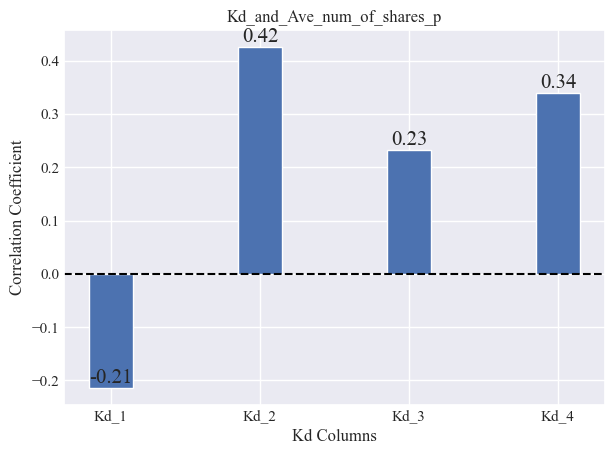

In [9]:
# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd_1'].corr(df['Average number of shares purchased_1']),
    df['Kd_2'].corr(df['Average number of shares purchased_2']),
    df['Kd_3'].corr(df['Average number of shares purchased_3']),
    df['Kd_4'].corr(df['Average number of shares purchased_4'])
]
# グラフの作成
plt.bar(['Kd_1', 'Kd_2', 'Kd_3', 'Kd_4'], correlation_values, width=0.3)
plt.xlabel('Kd Columns')
plt.ylabel('Correlation Coefficient')

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('Kd_and_Ave_num_of_shares_p')#平均購入株数での比較
plt.tight_layout()
#plt.savefig("Kd_and_Ave_num_of_shares_p.png")
plt.show()


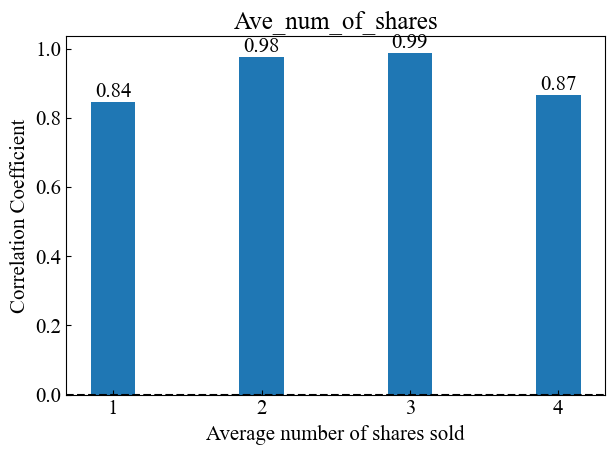

In [21]:
# 特定の列同士の相関係数を計算
correlation_values = [
    df['Average number of shares sold_1'].corr(df['Average number of shares purchased_1']),
    df['Average number of shares sold_2'].corr(df['Average number of shares purchased_2']),
    df['Average number of shares sold_3'].corr(df['Average number of shares purchased_3']),
    df['Average number of shares sold_4'].corr(df['Average number of shares purchased_4'])
]
# グラフの作成
plt.bar(['1', '2', '3', '4'], correlation_values, width=0.3)
plt.xlabel('Average number of shares sold')
plt.ylabel('Correlation Coefficient')

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('Ave_num_of_shares')#平均購入株数での比較
plt.tight_layout()
plt.savefig("Ave_num_of_shares_p_and_s.png")
plt.show()

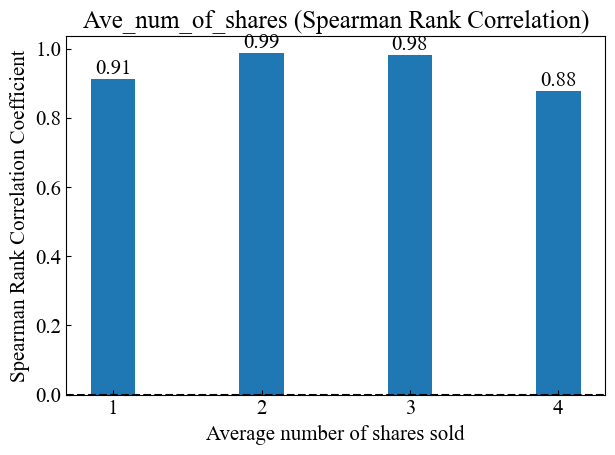

In [22]:
# 特定の列同士のSpearmanの順位相関係数を計算
correlation_values = [
    df['Average number of shares sold_1'].corr(df['Average number of shares purchased_1'], method='spearman'),
    df['Average number of shares sold_2'].corr(df['Average number of shares purchased_2'], method='spearman'),
    df['Average number of shares sold_3'].corr(df['Average number of shares purchased_3'], method='spearman'),
    df['Average number of shares sold_4'].corr(df['Average number of shares purchased_4'], method='spearman')
]

# グラフの作成
plt.bar(['1', '2', '3', '4'], correlation_values, width=0.3)
plt.xlabel('Average number of shares sold')
plt.ylabel('Spearman Rank Correlation Coefficient')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')
plt.title('Ave_num_of_shares (Spearman Rank Correlation)')
plt.tight_layout()
plt.savefig("Spearman_Ave_num_of_shares_p_and_s.png")
plt.show()

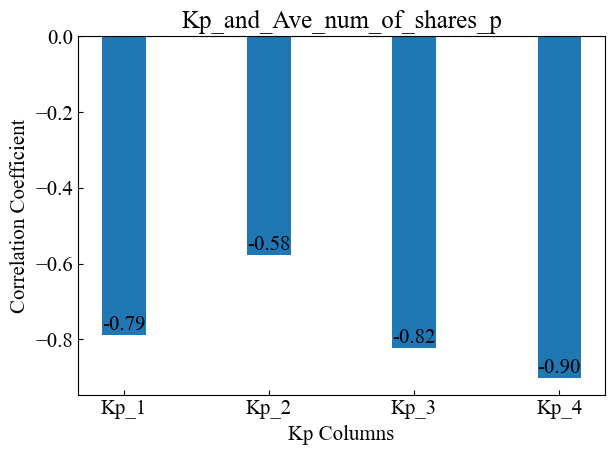

In [5]:
# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kp_1'].corr(df['Average number of shares purchased_1']),
    df['Kp_2'].corr(df['Average number of shares purchased_2']),
    df['Kp_3'].corr(df['Average number of shares purchased_3']),
    df['Kp_4'].corr(df['Average number of shares purchased_4'])
]
# グラフの作成
plt.bar(['Kp_1', 'Kp_2', 'Kp_3', 'Kp_4'], correlation_values, width=0.3)
plt.xlabel('Kp Columns')
plt.ylabel('Correlation Coefficient')

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('Kp_and_Ave_num_of_shares_p')#平均購入株数での比較
plt.tight_layout()
plt.savefig("Kp_and_Ave_num_of_shares_p.png")
plt.show()

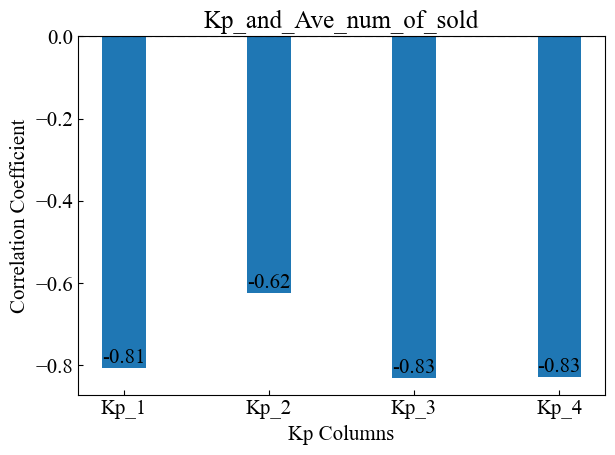

In [10]:
# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kp_1'].corr(df['Average number of shares sold_1']),
    df['Kp_2'].corr(df['Average number of shares sold_2']),
    df['Kp_3'].corr(df['Average number of shares sold_3']),
    df['Kp_4'].corr(df['Average number of shares sold_4'])
]
# グラフの作成
plt.bar(['Kp_1', 'Kp_2', 'Kp_3', 'Kp_4'], correlation_values, width=0.3)
plt.xlabel('Kp Columns')
plt.ylabel('Correlation Coefficient')

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('Kp_and_Ave_num_of_sold')#平均購入株数での比較
plt.tight_layout()
plt.savefig("Kp_and_Ave_num_of_shares_sold.png")
plt.show()

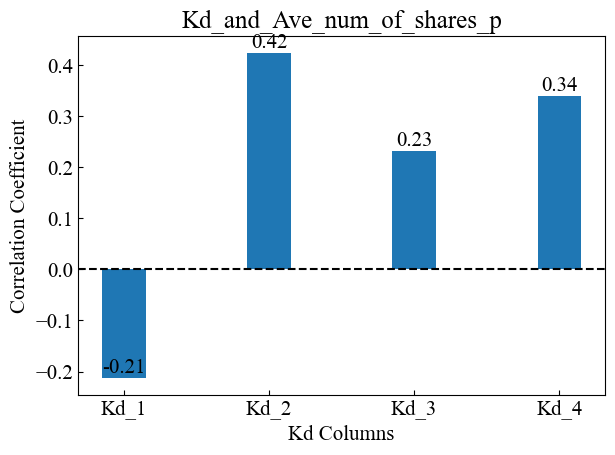

In [8]:
# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd_1'].corr(df['Average number of shares purchased_1']),
    df['Kd_2'].corr(df['Average number of shares purchased_2']),
    df['Kd_3'].corr(df['Average number of shares purchased_3']),
    df['Kd_4'].corr(df['Average number of shares purchased_4'])
]
# グラフの作成
plt.bar(['Kd_1', 'Kd_2', 'Kd_3', 'Kd_4'], correlation_values, width=0.3)
plt.xlabel('Kd Columns')
plt.ylabel('Correlation Coefficient')

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('Kd_and_Ave_num_of_shares_p')#平均購入株数での比較
plt.tight_layout()
plt.savefig("Kd_and_Ave_num_of_shares_p.png")
plt.show()

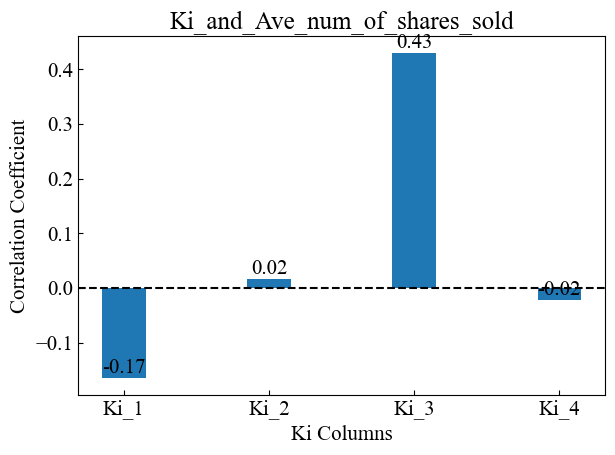

In [17]:

# 特定の列同士の相関係数を計算
correlation_values = [
    df['Ki_1'].corr(df['Average number of shares sold_1']),
    df['Ki_2'].corr(df['Average number of shares sold_2']),
    df['Ki_3'].corr(df['Average number of shares sold_3']),
    df['Ki_4'].corr(df['Average number of shares sold_4'])
]
# グラフの作成
plt.bar(['Ki_1', 'Ki_2', 'Ki_3', 'Ki_4'], correlation_values, width=0.3)
plt.xlabel('Ki Columns')
plt.ylabel('Correlation Coefficient')

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('Ki_and_Ave_num_of_shares_sold')#平均購入株数での比較
plt.tight_layout()
plt.savefig("Ki_and_Ave_num_of_shares_sold.png")
plt.show()

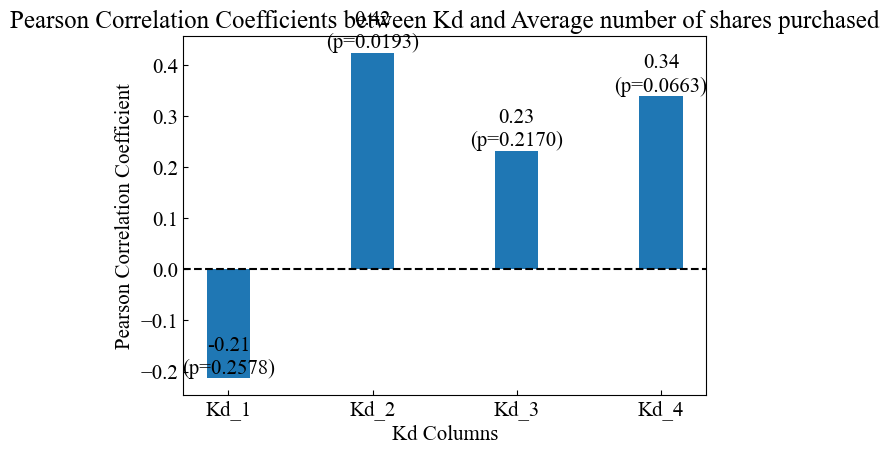

Pearson's correlation coefficient: -0.2132962752316964
P-value: 0.25775473238909496
相関は統計的に有意ではありません。


In [28]:
from scipy.stats import pearsonr
# 特定の列同士のピアソンの相関係数とp値の計算
correlation_values, p_values = zip(*[
    pearsonr(df[f'Kd_{i}'], df[f'Average number of shares purchased_{i}'])
    for i in range(1, 5)
])

# グラフの作成
plt.bar([f'Kd_{i}' for i in range(1, 5)], correlation_values, width=0.3)
plt.xlabel('Kd Columns')
plt.ylabel('Pearson Correlation Coefficient')

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値とp値を各棒の上に表示
for i, (value, p_value) in enumerate(zip(correlation_values, p_values)):
    plt.text(i, value, f'{value:.2f}\n(p={p_value:.4f})', ha='center', va='bottom')

plt.title('Pearson Correlation Coefficients between Kd and Average number of shares purchased')
plt.tight_layout()
#plt.savefig("pearson_correlation_graph_Kd_and_Ave_num_of_shares_p.png")
plt.show()
# 特定の列同士のピアソンの相関係数とp値の計算
correlation_value, p_value = pearsonr(df['Kd_1'], df['Average number of shares purchased_1'])

# 結果の表示
print(f"Pearson's correlation coefficient: {correlation_value}")
print(f"P-value: {p_value}")

# 通常の有意水準（たとえば0.05）と比較して判定
if p_value < 0.05:
    print("相関は統計的に有意です。")
else:
    print("相関は統計的に有意ではありません。")


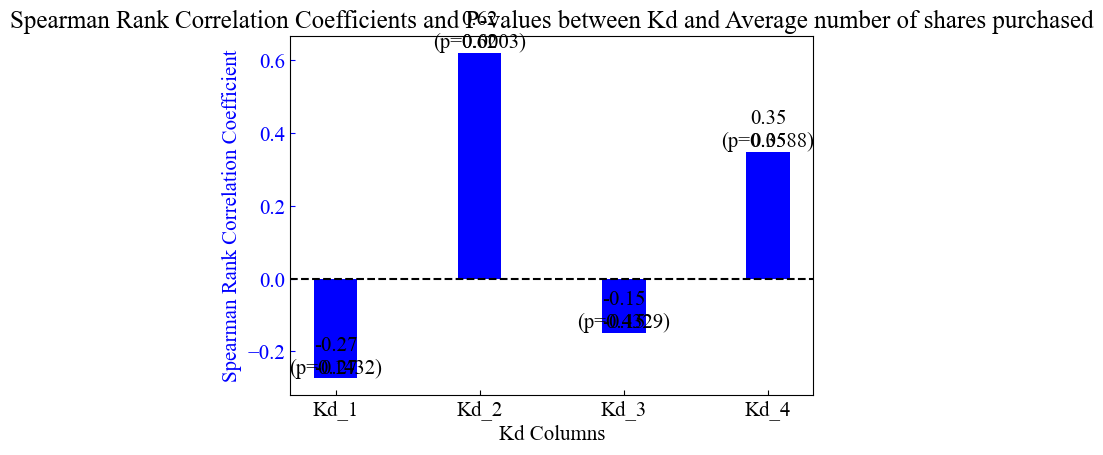

In [31]:
# 特定の列同士のスピアマンの順位相関係数とp値を計算
correlation_data = [
    spearmanr(df[f'Kd_{i}'], df[f'Average number of shares purchased_{i}'])
    for i in range(1, 5)
]

correlation_values = [corr.correlation for corr in correlation_data]
p_values = [corr.pvalue for corr in correlation_data]

# グラフの作成
fig, ax1 = plt.subplots()

# 相関係数の表示
ax1.bar([f'Kd_{i}' for i in range(1, 5)], correlation_values, width=0.3, color='b', label='Correlation Coefficient')
ax1.set_xlabel('Kd Columns')
ax1.set_ylabel('Spearman Rank Correlation Coefficient', color='b')
ax1.tick_params('y', colors='b')

# p値の表示
#ax2 = ax1.twinx()
#ax2.plot([f'Kd_{i}' for i in range(1, 5)], p_values, color='r', marker='o', label='P-value')
#ax2.set_ylabel('P-value', color='r')
#ax2.tick_params('y', colors='r')
# 数値とp値を各棒の上に表示
for i, (value, p_value) in enumerate(zip(correlation_values, p_values)):
    plt.text(i, value, f'{value:.2f}\n(p={p_value:.4f})', ha='center', va='bottom')
    
# 0の位置に点線を引く
ax1.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, (corr_value, p_value) in enumerate(zip(correlation_values, p_values)):
    ax1.text(i, corr_value, f'{corr_value:.2f}', ha='center', va='bottom')

plt.title('Spearman Rank Correlation Coefficients and P-values between Kd and Average number of shares purchased')
plt.tight_layout()
plt.savefig("spearman_correlation_graph_with_p_values_Kd_and_Ave_num_of_shares_p.png")
plt.show()

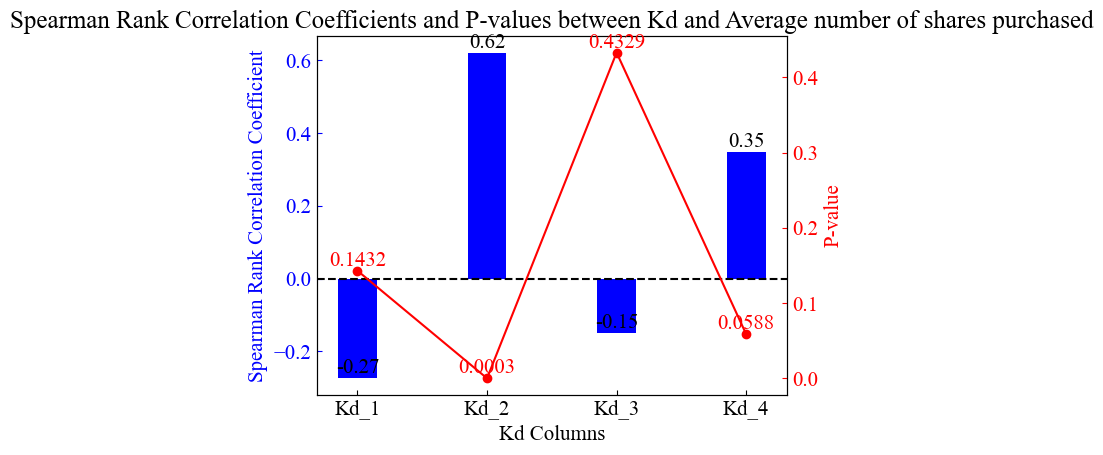

In [33]:


# 特定の列同士のスピアマンの順位相関係数とp値を計算
correlation_data = [
    spearmanr(df[f'Kd_{i}'], df[f'Average number of shares purchased_{i}'])
    for i in range(1, 5)
]

correlation_values = [corr.correlation for corr in correlation_data]
p_values = [corr.pvalue for corr in correlation_data]

# グラフの作成
fig, ax1 = plt.subplots()

# 相関係数の表示
bars = ax1.bar([f'Kd_{i}' for i in range(1, 5)], correlation_values, width=0.3, color='b', label='Correlation Coefficient')
ax1.set_xlabel('Kd Columns')
ax1.set_ylabel('Spearman Rank Correlation Coefficient', color='b')
ax1.tick_params('y', colors='b')

# p値の表示
ax2 = ax1.twinx()
ax2.plot([f'Kd_{i}' for i in range(1, 5)], p_values, color='r', marker='o', label='P-value')
ax2.set_ylabel('P-value', color='r')
ax2.tick_params('y', colors='r')

# 0の位置に点線を引く
ax1.axhline(y=0, color='black', linestyle='dashed')

# 数値を各バーの上に表示（高さに応じて自動で位置を調整）
for bar, corr_value, p_value in zip(bars, correlation_values, p_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{corr_value:.2f}', ha='center', va='bottom')
    ax2.text(bar.get_x() + bar.get_width() / 2, p_value, f'{p_value:.4f}', ha='center', va='bottom', color='r')

plt.title('Spearman Rank Correlation Coefficients and P-values between Kd and Average number of shares purchased')
plt.tight_layout()
#plt.savefig("spearman_correlation_graph_with_p_values_adjusted_positions_Kd_and_Ave_num_of_shares_p.png")
plt.show()


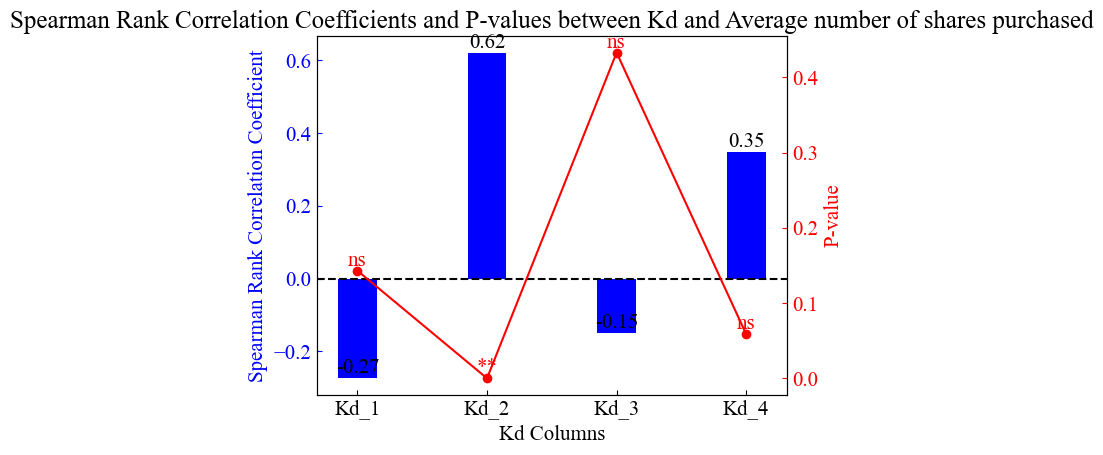

In [39]:

# 特定の列同士のスピアマンの順位相関係数とp値を計算
correlation_data = [
    spearmanr(df[f'Kd_{i}'], df[f'Average number of shares purchased_{i}'])
    for i in range(1, 5)
]

correlation_values = [corr.correlation for corr in correlation_data]
p_values = [corr.pvalue for corr in correlation_data]

# 有意水準
alpha = 0.05

# グラフの作成
fig, ax1 = plt.subplots()

# 相関係数の表示
bars = ax1.bar([f'Kd_{i}' for i in range(1, 5)], correlation_values, width=0.3, color='b', label='Correlation Coefficient')
ax1.set_xlabel('Kd Columns')
ax1.set_ylabel('Spearman Rank Correlation Coefficient', color='b')
ax1.tick_params('y', colors='b')

# p値の表示
ax2 = ax1.twinx()
ax2.plot([f'Kd_{i}' for i in range(1, 5)], p_values, color='r', marker='o', label='P-value')#, marker='o'
ax2.set_ylabel('P-value', color='r')
ax2.tick_params('y', colors='r')

# 0の位置に点線を引く
ax1.axhline(y=0, color='black', linestyle='dashed')

# 数値を各バーの上に表示（高さに応じて自動で位置を調整）
for bar, corr_value, p_value in zip(bars, correlation_values, p_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{corr_value:.2f}', ha='center', va='bottom')
    
    # p値が有意水準以下なら星を表示、そうでなければ非有意を表示
    if p_value < alpha:
        ax2.text(bar.get_x() + bar.get_width() / 2, p_value, '**', ha='center', va='bottom', color='r')
    else:
        ax2.text(bar.get_x() + bar.get_width() / 2, p_value, 'ns', ha='center', va='bottom', color='r')

plt.title('Spearman Rank Correlation Coefficients and P-values between Kd and Average number of shares purchased')
plt.tight_layout()
#plt.savefig("spearman_correlation_graph_with_p_values_and_significance_Kd_and_Ave_num_of_shares_p.png")
plt.show()


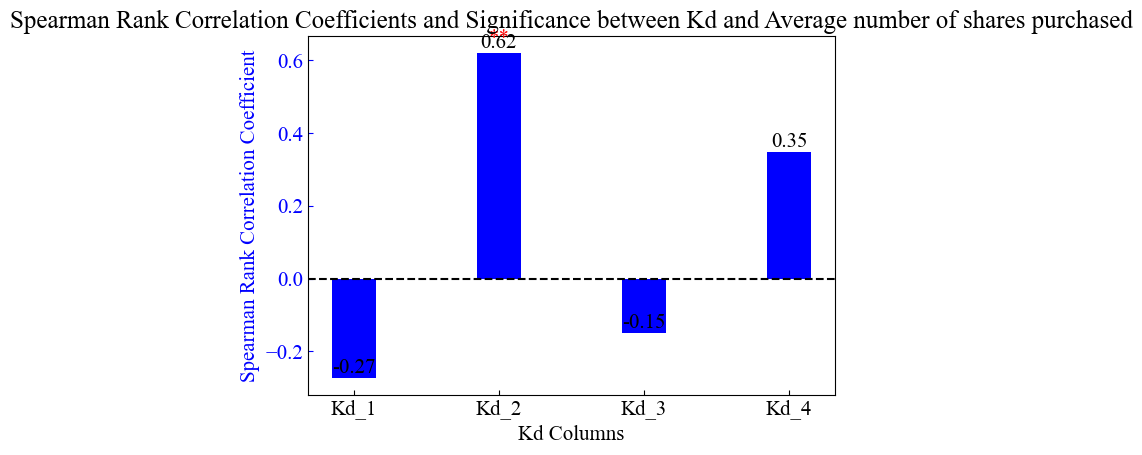

In [46]:

# 特定の列同士のスピアマンの順位相関係数とp値を計算
correlation_data = [
    spearmanr(df[f'Kd_{i}'], df[f'Average number of shares purchased_{i}'])
    for i in range(1, 5)
]

correlation_values = [corr.correlation for corr in correlation_data]
p_values = [corr.pvalue for corr in correlation_data]

# 有意水準
alpha = 0.05

# グラフの作成
fig, ax1 = plt.subplots()

# 相関係数の表示
bars = ax1.bar([f'Kd_{i}' for i in range(1, 5)], correlation_values, width=0.3, color='b', label='Correlation Coefficient')
ax1.set_xlabel('Kd Columns')
ax1.set_ylabel('Spearman Rank Correlation Coefficient', color='b')
ax1.tick_params('y', colors='b')

# 0の位置に点線を引く
ax1.axhline(y=0, color='black', linestyle='dashed')

# 数値とp値を各棒の上に表示
#for i, (value, p_value) in enumerate(zip(correlation_values, p_values)):
    #plt.text(i, value, f'{value:.2f}\n(p={p_value:.4f})', ha='center', va='bottom')

# 数値を各バーの上に表示（高さに応じて自動で位置を調整）
for bar, corr_value, p_value in zip(bars, correlation_values, p_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{corr_value:.2f}', ha='center', va='bottom')
    
    # p値が有意水準以下ならば星（**）を表示、そうでなければ何も表示しない
    if p_value < alpha:
        ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.01, '**', ha='center', va='bottom', color='r')

plt.title('Spearman Rank Correlation Coefficients and Significance between Kd and Average number of shares purchased')
plt.tight_layout()
#plt.savefig("spearman_correlation_graph_with_significance_Kd_and_Ave_num_of_shares_p.png")
plt.show()


In [8]:
# 特定の列同士の相関係数を取得（例: 列 'column1' と列 'column2' の相関係数）
correlation_value1 = df['Kd_1'].corr(df['Average number of shares sold_1'])
print("Kd_1 と Average number of shares sold_1 の相関係数:", correlation_value1)
correlation_value2 = df['Kd_2'].corr(df['Average number of shares sold_2'])
print("Kd_2 と Average number of shares sold_2 の相関係数:", correlation_value2)
correlation_value3 = df['Kd_3'].corr(df['Average number of shares sold_3'])
print("Kd_3 と Average number of shares sold_3 の相関係数:", correlation_value3)
correlation_value4 = df['Kd_4'].corr(df['Average number of shares sold_4'])
print("Kd_4 と Average number of shares sold_4 の相関係数:", correlation_value4)

Kd_1 と Average number of shares sold_1 の相関係数: -0.4058824783390903
Kd_2 と Average number of shares sold_2 の相関係数: 0.4401710789306039
Kd_3 と Average number of shares sold_3 の相関係数: 0.20432950901278518
Kd_4 と Average number of shares sold_4 の相関係数: 0.4285271270427987


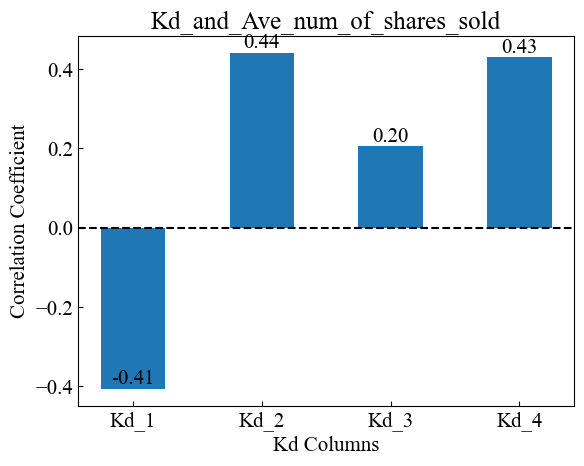

In [10]:

# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd_1'].corr(df['Average number of shares sold_1']),
    df['Kd_2'].corr(df['Average number of shares sold_2']),
    df['Kd_3'].corr(df['Average number of shares sold_3']),
    df['Kd_4'].corr(df['Average number of shares sold_4'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd_1', 'Kd_2', 'Kd_3', 'Kd_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Kd_and_Ave_num_of_shares_sold')

# 画像として保存
plt.savefig('correlation_graph_Kd_and_Ave_num_of_shares_sold.png')
plt.show()


In [ ]:
# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd_1'].corr(df['Average number of shares purchased_1']),
    df['Kd_2'].corr(df['Average number of shares purchased_2']),
    df['Kd_3'].corr(df['Average number of shares purchased_3']),
    df['Kd_4'].corr(df['Average number of shares purchased_4'])
]
# グラフの作成
plt.bar(['Kd_1', 'Kd_2', 'Kd_3', 'Kd_4'], correlation_values, width=0.3)
plt.xlabel('Kd Columns')
plt.ylabel('Correlation Coefficient')

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('Correlation Coefficients between Kd and Average number of shares purchased')
plt.show()

In [9]:
# 特定の列同士の相関係数を取得（例: 列 'column1' と列 'column2' の相関係数）
correlation_value1 = df['Kd_1'].corr(df['Kp_1'])
print("Kd_1 と Kp_1 の相関係数:", correlation_value1)
correlation_value2 = df['Kd_2'].corr(df['Kp_2'])
print("Kd_2 と Kp_2 の相関係数:", correlation_value2)
correlation_value3 = df['Kd_3'].corr(df['Kp_3'])
print("Kd_3 と Kp_3 の相関係数:", correlation_value3)
correlation_value4 = df['Kd_4'].corr(df['Kp_4'])
print("Kd_4 と Kp_4 の相関係数:", correlation_value4)

Kd_1 と Kp_1 の相関係数: 0.18789000839207562
Kd_2 と Kp_2 の相関係数: -0.851936114919481
Kd_3 と Kp_3 の相関係数: -0.512346951922631
Kd_4 と Kp_4 の相関係数: -0.46136203635311834


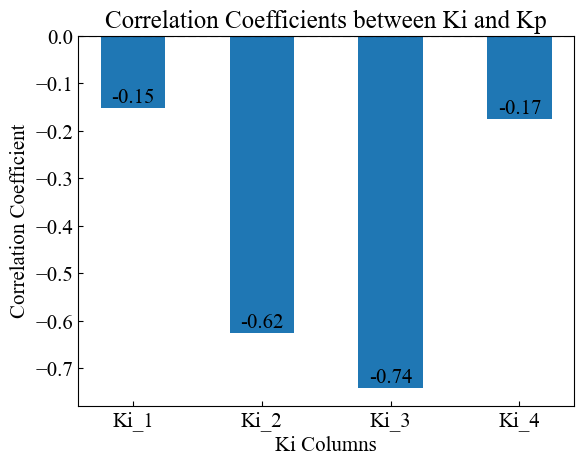

In [13]:

# 特定の列同士の相関係数を計算
correlation_values = [
    df['Ki_1'].corr(df['Kp_1']),
    df['Ki_2'].corr(df['Kp_2']),
    df['Ki_3'].corr(df['Kp_3']),
    df['Ki_4'].corr(df['Kp_4'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Ki_1', 'Ki_2', 'Ki_3', 'Ki_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Ki Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Ki and Kp')

# 画像として保存
plt.savefig('correlation_graph_Ki_and_Kp.png')
plt.show()


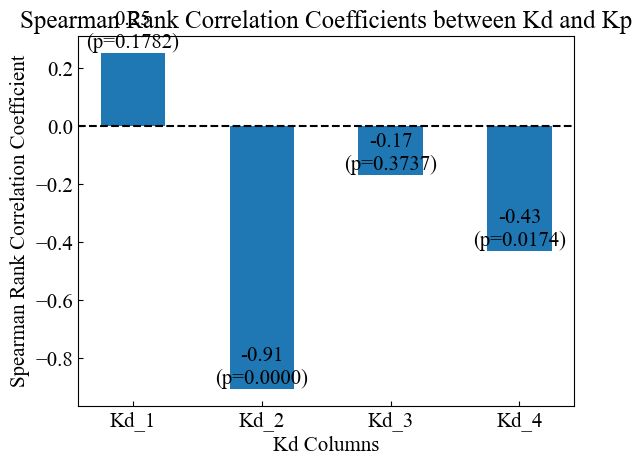

In [25]:

# 特定の列同士のスピアマンの順位相関係数とp値の計算
correlation_values, p_values = zip(*[
    spearmanr(df[f'Kd_{i}'], df[f'Kp_{i}'])
    for i in range(1, 5)
])

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar([f'Kd_{i}' for i in range(1, 5)], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値とp値を各棒の上に表示
for i, (value, p_value) in enumerate(zip(correlation_values, p_values)):
    plt.text(i, value, f'{value:.2f}\n(p={p_value:.4f})', ha='center', va='bottom')

plt.xlabel('Kd Columns')
plt.ylabel('Spearman Rank Correlation Coefficient')
plt.title('Spearman Rank Correlation Coefficients between Kd and Kp')
plt.show()


In [11]:
# 特定の列同士の相関係数を取得（例: 列 'column1' と列 'column2' の相関係数）
correlation_value1 = df['Kd_1'].corr(df['Ki_1'])
print("Kd_1 と Ki_1 の相関係数:", correlation_value1)
correlation_value2 = df['Kd_2'].corr(df['Ki_2'])
print("Kd_2 と Ki_2 の相関係数:", correlation_value2)
correlation_value3 = df['Kd_3'].corr(df['Ki_3'])
print("Kd_3 と Ki_3 の相関係数:", correlation_value3)
correlation_value4 = df['Kd_4'].corr(df['Ki_4'])
print("Kd_4 と Ki_4 の相関係数:", correlation_value4)

Kd_1 と Ki_1 の相関係数: 0.48606445184414954
Kd_2 と Ki_2 の相関係数: 0.5331188258996381
Kd_3 と Ki_3 の相関係数: 0.7812450295132402
Kd_4 と Ki_4 の相関係数: -0.07139529858047779


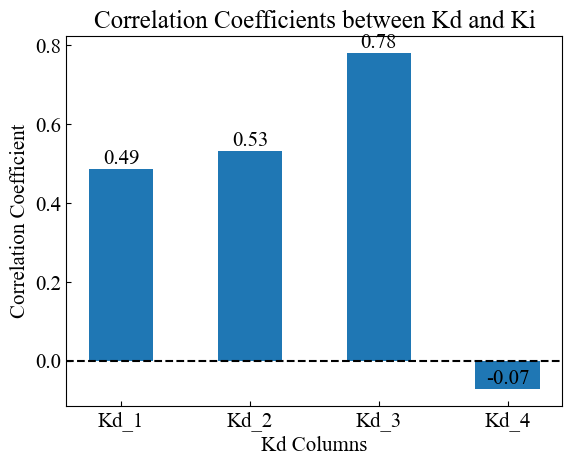

In [16]:


# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd_1'].corr(df['Ki_1']),
    df['Kd_2'].corr(df['Ki_2']),
    df['Kd_3'].corr(df['Ki_3']),
    df['Kd_4'].corr(df['Ki_4'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd_1', 'Kd_2', 'Kd_3', 'Kd_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Kd and Ki')

# 画像として保存
plt.savefig('correlation_graph_Kd_and_Ki.png')
plt.show()


In [12]:
# 特定の列同士の相関係数を取得（例: 列 'column1' と列 'column2' の相関係数）
correlation_value1 = df['Kd_1'].corr(df['Average stock price change rate at time of purchase_1'])
print("Kd_1 と Average stock price change rate at time of purchase_1 の相関係数:", correlation_value1)
correlation_value2 = df['Kd_2'].corr(df['Average stock price change rate at time of purchase_2'])
print("Kd_2 と Average stock price change rate at time of purchase_2 の相関係数:", correlation_value2)
correlation_value3 = df['Kd_3'].corr(df['Average stock price change rate at time of purchase_3'])
print("Kd_3 と Average stock price change rate at time of purchase_3 の相関係数:", correlation_value3)
correlation_value4 = df['Kd_4'].corr(df['Average stock price change rate at time of purchase_4'])
print("Kd_4 と Average stock price change rate at time of purchase_4 の相関係数:", correlation_value4)

Kd_1 と Average stock price change rate at time of purchase_1 の相関係数: 0.44688902158003646
Kd_2 と Average stock price change rate at time of purchase_2 の相関係数: -0.03916697678989304
Kd_3 と Average stock price change rate at time of purchase_3 の相関係数: -0.05433803628471448
Kd_4 と Average stock price change rate at time of purchase_4 の相関係数: 0.15668587689511457


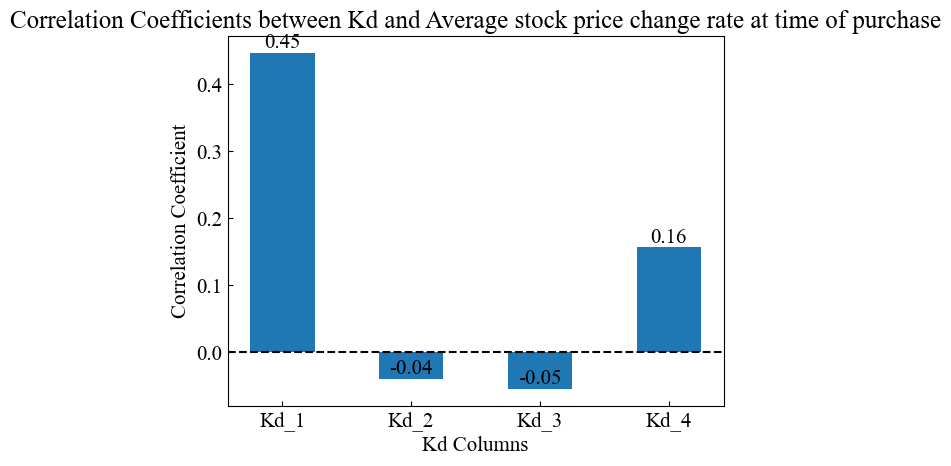

In [13]:

# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd_1'].corr(df['Average stock price change rate at time of purchase_1']),
    df['Kd_2'].corr(df['Average stock price change rate at time of purchase_2']),
    df['Kd_3'].corr(df['Average stock price change rate at time of purchase_3']),
    df['Kd_4'].corr(df['Average stock price change rate at time of purchase_4'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd_1', 'Kd_2', 'Kd_3', 'Kd_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Kd and Average stock price change rate at time of purchase')

# 画像として保存
plt.savefig('correlation_graph_Kd_and_Ave-stockprice_cr-at-purchase.png')
plt.show()


In [ ]:

# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd_1'].corr(df['Average stock price change rate at time of purchase_1']),
    df['Kd_2'].corr(df['Average stock price change rate at time of purchase_2']),
    df['Kd_3'].corr(df['Average stock price change rate at time of purchase_3']),
    df['Kd_4'].corr(df['Average stock price change rate at time of purchase_4'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd_1', 'Kd_2', 'Kd_3', 'Kd_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Kd and Average stock price change rate at time of purchase')

# 画像として保存
plt.savefig('correlation_graph_Kd_and_Ave-stockprice_cr-at-purchase.png')
plt.show()

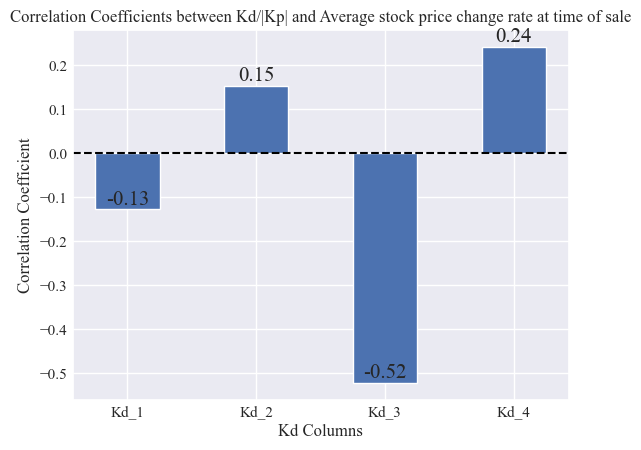

In [10]:
#相関係数を計算
correlation_values = [
    df['Kd_1'].corr(df['Average stock price change rate at time of sale_1']),
    df['Kd_2'].corr(df['Average stock price change rate at time of sale_2']),
    df['Kd_3'].corr(df['Average stock price change rate at time of sale_3']),
    df['Kd_4'].corr(df['Average stock price change rate at time of sale_4'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd_1', 'Kd_2', 'Kd_3', 'Kd_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Kd/|Kp| and Average stock price change rate at time of sale')

# 画像として保存
plt.savefig('correlation_graph_Kd_and_Ave-stockprice-crate-at-sale.png')
plt.show()

In [15]:
# 特定の列同士の相関係数を取得（例: 列 'column1' と列 'column2' の相関係数）
correlation_value1 = df['Kd_1'].corr(df['Average stock price change rate at time of purchase_2_1 days ago'])
print("Kd_1 と Average stock price CR_p_1 の相関係数:", correlation_value1)
correlation_value2 = df['Kd_2'].corr(df['Average stock price change rate at time of purchase_2_2 days ago'])
print("Kd_2 と Average stock price CR_p_2 の相関係数:", correlation_value2)
correlation_value3 = df['Kd_3'].corr(df['Average stock price change rate at time of purchase_2_3 days ago'])
print("Kd_3 と Average stock price CR_p_3 の相関係数:", correlation_value3)
correlation_value4 = df['Kd_4'].corr(df['Average stock price change rate at time of purchase_2_4 days ago'])
print("Kd_4 と Average stock price CR_p_4 の相関係数:", correlation_value4)

Kd_1 と Average stock price CR_p_1 の相関係数: 0.493804030073922
Kd_2 と Average stock price CR_p_2 の相関係数: 0.0053230995877383055
Kd_3 と Average stock price CR_p_3 の相関係数: -0.117238022622772
Kd_4 と Average stock price CR_p_4 の相関係数: 0.18474325515946466


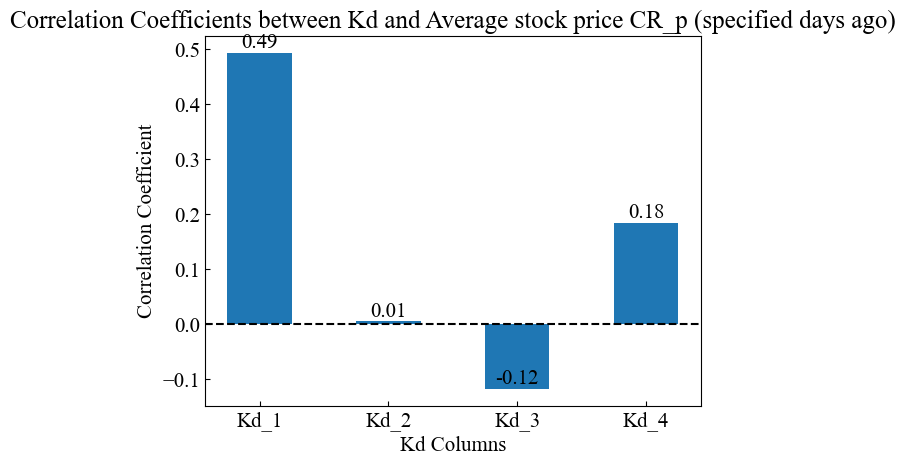

In [14]:

# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd_1'].corr(df['Average stock price change rate at time of purchase_2_1 days ago']),
    df['Kd_2'].corr(df['Average stock price change rate at time of purchase_2_2 days ago']),
    df['Kd_3'].corr(df['Average stock price change rate at time of purchase_2_3 days ago']),
    df['Kd_4'].corr(df['Average stock price change rate at time of purchase_2_4 days ago'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd_1', 'Kd_2', 'Kd_3', 'Kd_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Kd and Average stock price CR_p (specified days ago)')

# 画像として保存
plt.savefig('correlation_graph_Kd_and_Ave-stockprice_CR_p_2day.png')
plt.show()


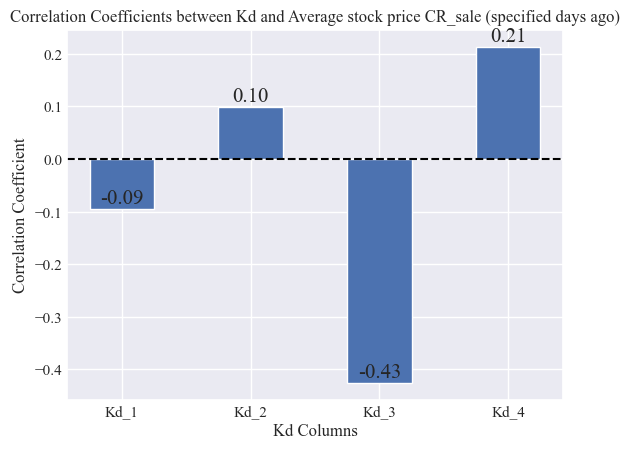

In [12]:

# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd_1'].corr(df['Average stock price change rate at time of sale_2 days_1 ago']),
    df['Kd_2'].corr(df['Average stock price change rate at time of sale_2 days_2 ago']),
    df['Kd_3'].corr(df['Average stock price change rate at time of sale_2 days_3 ago']),
    df['Kd_4'].corr(df['Average stock price change rate at time of sale_2 days_4 ago'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd_1', 'Kd_2', 'Kd_3', 'Kd_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Kd and Average stock price CR_sale (specified days ago)')

# 画像として保存
plt.savefig('correlation_graph_Kd_and_Ave-stockprice_CR_sale_2day.png')
plt.show()


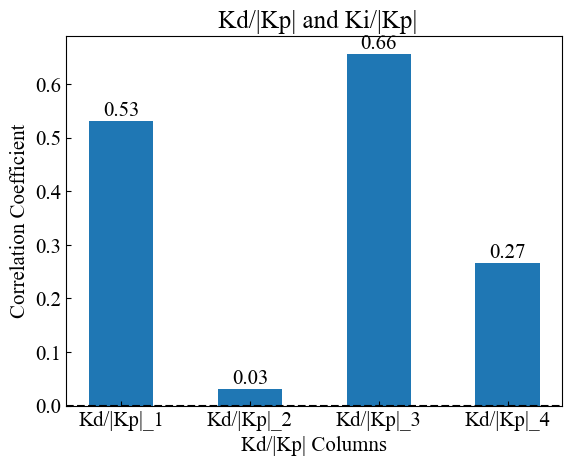

In [19]:
# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd/|Kp|_1'].corr(df['Ki/|Kp|_1']),
    df['Kd/|Kp|_2'].corr(df['Ki/|Kp|_2']),
    df['Kd/|Kp|_3'].corr(df['Ki/|Kp|_3']),
    df['Kd/|Kp|_4'].corr(df['Ki/|Kp|_4'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd/|Kp|_1', 'Kd/|Kp|_2', 'Kd/|Kp|_3', 'Kd/|Kp|_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd/|Kp| Columns')
plt.ylabel('Correlation Coefficient')
plt.title(' Kd/|Kp| and Ki/|Kp|')

# 画像として保存
plt.savefig('correlation_graph_abs_Kd_and_abs_Ki.png')
plt.show()


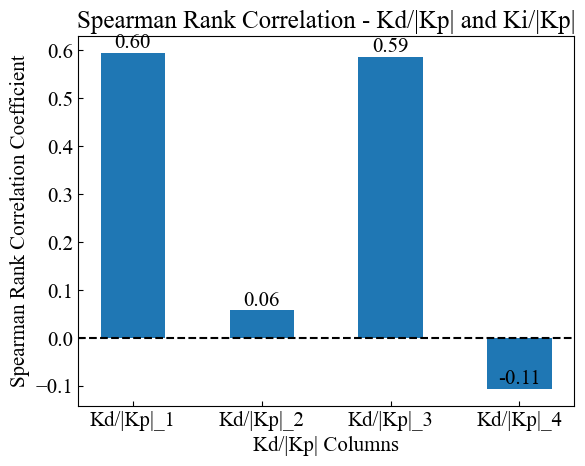

In [23]:
# 特定の列同士のSpearmanの順位相関係数を計算
correlation_values = [
    df['Kd/|Kp|_1'].corr(df['Ki/|Kp|_1'], method='spearman'),
    df['Kd/|Kp|_2'].corr(df['Ki/|Kp|_2'], method='spearman'),
    df['Kd/|Kp|_3'].corr(df['Ki/|Kp|_3'], method='spearman'),
    df['Kd/|Kp|_4'].corr(df['Ki/|Kp|_4'], method='spearman')
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd/|Kp|_1', 'Kd/|Kp|_2', 'Kd/|Kp|_3', 'Kd/|Kp|_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd/|Kp| Columns')
plt.ylabel('Spearman Rank Correlation Coefficient')
plt.title('Spearman Rank Correlation - Kd/|Kp| and Ki/|Kp|')

# 画像として保存
plt.savefig('Spearman_correlation_graph_abs_Kd_and_abs_Ki.png')
plt.show()

In [24]:
import pandas as pd
from scipy.stats import spearmanr
# 特定の列同士のSpearmanの順位相関係数とその検定を計算
correlation_values = []
p_values = []

for i in range(1, 5):
    correlation, p_value = spearmanr(df[f'Kd/|Kp|_{i}'], df[f'Ki/|Kp|_{i}'])
    correlation_values.append(correlation)
    p_values.append(p_value)

# 有意水準
alpha = 0.05

# 判定結果を表示
for i, (value, p_value) in enumerate(zip(correlation_values, p_values)):
    print(f'Correlation between Kd/|Kp|_{i+1} and Ki/|Kp|_{i+1}: {value:.4f}')
    print(f'P-value: {p_value:.4f}')
    
    if p_value < alpha:
        print('結果: 帰無仮説を棄却します（相関は統計的に有意です）\n')
    else:
        print('結果: 帰無仮説を棄却できません（統計的に有意な相関はありません）\n')

Correlation between Kd/|Kp|_1 and Ki/|Kp|_1: 0.5951
P-value: 0.0005
結果: 帰無仮説を棄却します（相関は統計的に有意です）

Correlation between Kd/|Kp|_2 and Ki/|Kp|_2: 0.0576
P-value: 0.7623
結果: 帰無仮説を棄却できません（統計的に有意な相関はありません）

Correlation between Kd/|Kp|_3 and Ki/|Kp|_3: 0.5862
P-value: 0.0007
結果: 帰無仮説を棄却します（相関は統計的に有意です）

Correlation between Kd/|Kp|_4 and Ki/|Kp|_4: -0.1066
P-value: 0.5752
結果: 帰無仮説を棄却できません（統計的に有意な相関はありません）



In [17]:
# 特定の列同士の相関係数を取得（例: 列 'column1' と列 'column2' の相関係数）
correlation_value1 = df['Kd/|Kp|_1'].corr(df['Average stock price change rate at time of purchase_1'])
print("Kd/|Kp|_1 と Average stock price change rate at time of purchase_1 の相関係数:", correlation_value1)
correlation_value2 = df['Kd/|Kp|_2'].corr(df['Average stock price change rate at time of purchase_2'])
print("Kd/|Kp|_2 と Average stock price change rate at time of purchase_2 の相関係数:", correlation_value2)
correlation_value3 = df['Kd/|Kp|_3'].corr(df['Average stock price change rate at time of purchase_3'])
print("Kd/|Kp|_3 と Average stock price change rate at time of purchase_3 の相関係数:", correlation_value3)
correlation_value4 = df['Kd/|Kp|_4'].corr(df['Average stock price change rate at time of purchase_4'])
print("Kd/|Kp|_4 と Average stock price change rate at time of purchase_4 の相関係数:", correlation_value4)

Kd/|Kp|_1 と Average stock price change rate at time of purchase_1 の相関係数: 0.48391796851570296
Kd/|Kp|_2 と Average stock price change rate at time of purchase_2 の相関係数: 0.46079860917159676
Kd/|Kp|_3 と Average stock price change rate at time of purchase_3 の相関係数: -0.040150271285992495
Kd/|Kp|_4 と Average stock price change rate at time of purchase_4 の相関係数: 0.10575013256905552


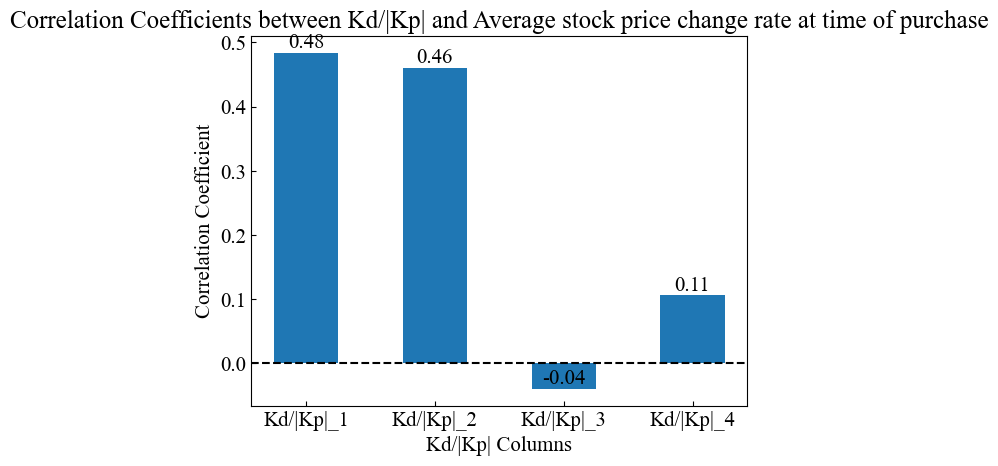

In [16]:

# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd/|Kp|_1'].corr(df['Average stock price change rate at time of purchase_1']),
    df['Kd/|Kp|_2'].corr(df['Average stock price change rate at time of purchase_2']),
    df['Kd/|Kp|_3'].corr(df['Average stock price change rate at time of purchase_3']),
    df['Kd/|Kp|_4'].corr(df['Average stock price change rate at time of purchase_4'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd/|Kp|_1', 'Kd/|Kp|_2', 'Kd/|Kp|_3', 'Kd/|Kp|_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd/|Kp| Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Kd/|Kp| and Average stock price change rate at time of purchase')

# 画像として保存
plt.savefig('correlation_graph_Kd-|Kp|_and_Ave-stockprice-crate-at-purchase.png')
plt.show()


In [16]:
# 特定の列同士の相関係数を取得（例: 列 'column1' と列 'column2' の相関係数）
correlation_value1 = df['Kd/|Kp|_1'].corr(df['Average stock price change rate at time of purchase_2_1 days ago'])
print("Kd/|Kp|_1 と Average stock price CR_p_1 の相関係数:", correlation_value1)
correlation_value2 = df['Kd/|Kp|_2'].corr(df['Average stock price change rate at time of purchase_2_2 days ago'])
print("Kd/|Kp|_2 と Average stock price CR_p_2 の相関係数:", correlation_value2)
correlation_value3 = df['Kd/|Kp|_3'].corr(df['Average stock price change rate at time of purchase_2_3 days ago'])
print("Kd/|Kp|_3 と Average stock price CR_p_3 の相関係数:", correlation_value3)
correlation_value4 = df['Kd/|Kp|_4'].corr(df['Average stock price change rate at time of purchase_2_4 days ago'])
print("Kd/|Kp|_4 と Average stock price CR_p_4 の相関係数:", correlation_value4)

Kd/|Kp|_1 と Average stock price CR_p_1 の相関係数: 0.5336828050338688
Kd/|Kp|_2 と Average stock price CR_p_2 の相関係数: 0.6049680497783767
Kd/|Kp|_3 と Average stock price CR_p_3 の相関係数: -0.05513190953166718
Kd/|Kp|_4 と Average stock price CR_p_4 の相関係数: 0.16469815942420626


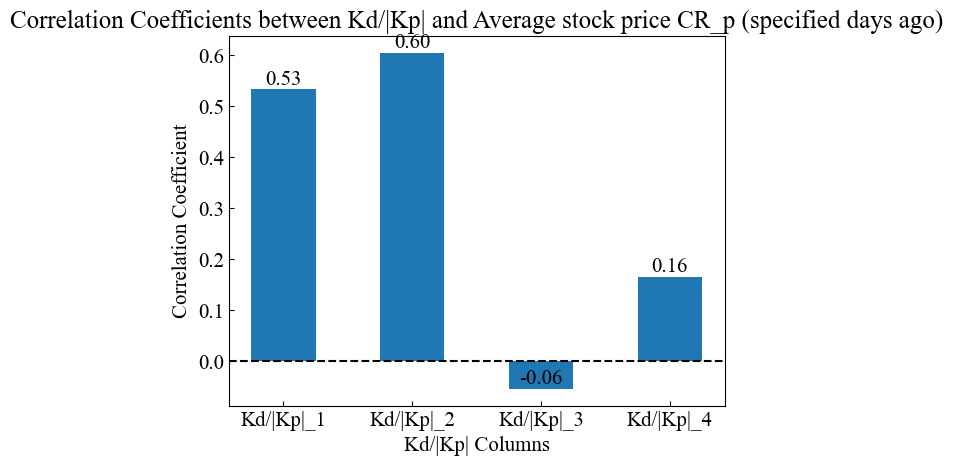

In [18]:

# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd/|Kp|_1'].corr(df['Average stock price change rate at time of purchase_2_1 days ago']),
    df['Kd/|Kp|_2'].corr(df['Average stock price change rate at time of purchase_2_2 days ago']),
    df['Kd/|Kp|_3'].corr(df['Average stock price change rate at time of purchase_2_3 days ago']),
    df['Kd/|Kp|_4'].corr(df['Average stock price change rate at time of purchase_2_4 days ago'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd/|Kp|_1', 'Kd/|Kp|_2', 'Kd/|Kp|_3', 'Kd/|Kp|_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd/|Kp| Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Kd/|Kp| and Average stock price CR_p (specified days ago)')

# 画像として保存
plt.savefig('correlation_graph_Kd-|Kp|_and_Ave-stockprice_CR_p_2day.png')
plt.show()


In [18]:
# 特定の列同士の相関係数を取得（例: 列 'column1' と列 'column2' の相関係数）
correlation_value1 = df['Kd/|Kp|_1'].corr(df['Average stock price change rate at time of sale_1'])
print("Kd/|Kp|_1 と Average stock price change rate at time of sale_1 の相関係数:", correlation_value1)
correlation_value2 = df['Kd/|Kp|_2'].corr(df['Average stock price change rate at time of sale_2'])
print("Kd/|Kp|_2 と Average stock price change rate at time of sale_2 の相関係数:", correlation_value2)
correlation_value3 = df['Kd/|Kp|_3'].corr(df['Average stock price change rate at time of sale_3'])
print("Kd/|Kp|_3 と Average stock price change rate at time of sale_3 の相関係数:", correlation_value3)
correlation_value4 = df['Kd/|Kp|_4'].corr(df['Average stock price change rate at time of sale_4'])
print("Kd/|Kp|_4 と Average stock price change rate at time of sale_4 の相関係数:", correlation_value4)

Kd/|Kp|_1 と Average stock price change rate at time of sale_1 の相関係数: -0.3271328635846266
Kd/|Kp|_2 と Average stock price change rate at time of sale_2 の相関係数: 0.12176057331715966
Kd/|Kp|_3 と Average stock price change rate at time of sale_3 の相関係数: -0.5681751538721453
Kd/|Kp|_4 と Average stock price change rate at time of sale_4 の相関係数: -0.13060523246425756


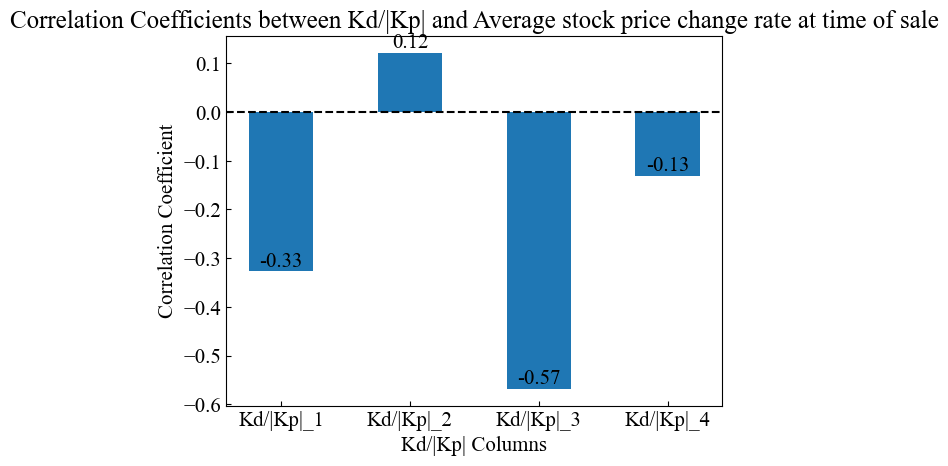

In [19]:

# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd/|Kp|_1'].corr(df['Average stock price change rate at time of sale_1']),
    df['Kd/|Kp|_2'].corr(df['Average stock price change rate at time of sale_2']),
    df['Kd/|Kp|_3'].corr(df['Average stock price change rate at time of sale_3']),
    df['Kd/|Kp|_4'].corr(df['Average stock price change rate at time of sale_4'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd/|Kp|_1', 'Kd/|Kp|_2', 'Kd/|Kp|_3', 'Kd/|Kp|_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd/|Kp| Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Kd/|Kp| and Average stock price change rate at time of sale')

# 画像として保存
plt.savefig('correlation_graph_Kd-|Kp|_and_Ave-stockprice-crate-at-sale.png')
plt.show()


In [20]:
# 特定の列同士の相関係数を取得（例: 列 'column1' と列 'column2' の相関係数）
correlation_value1 = df['Kd/|Kp|_1'].corr(df['Average stock price change rate at time of sale_2 days_1 ago'])
print("Kd/|Kp|_1 と Average stock price change rate at time of sale_2 days の相関係数:", correlation_value1)
correlation_value2 = df['Kd/|Kp|_2'].corr(df['Average stock price change rate at time of sale_2 days_2 ago'])
print("Kd/|Kp|_2 と Average stock price change rate at time of sale_2 days の相関係数:", correlation_value2)
correlation_value3 = df['Kd/|Kp|_3'].corr(df['Average stock price change rate at time of sale_2 days_3 ago'])
print("Kd/|Kp|_3 と Average stock price change rate at time of sale_2 days の相関係数:", correlation_value3)
correlation_value4 = df['Kd/|Kp|_4'].corr(df['Average stock price change rate at time of sale_2 days_4 ago'])
print("Kd/|Kp|_4 とAverage stock price change rate at time of sale_2 days の相関係数:", correlation_value4)

Kd/|Kp|_1 と Average stock price change rate at time of sale_2 days の相関係数: -0.31381130390582035
Kd/|Kp|_2 と Average stock price change rate at time of sale_2 days の相関係数: 0.009151255563959206
Kd/|Kp|_3 と Average stock price change rate at time of sale_2 days の相関係数: -0.43555219816516527
Kd/|Kp|_4 とAverage stock price change rate at time of sale_2 days の相関係数: -0.14233407692037778


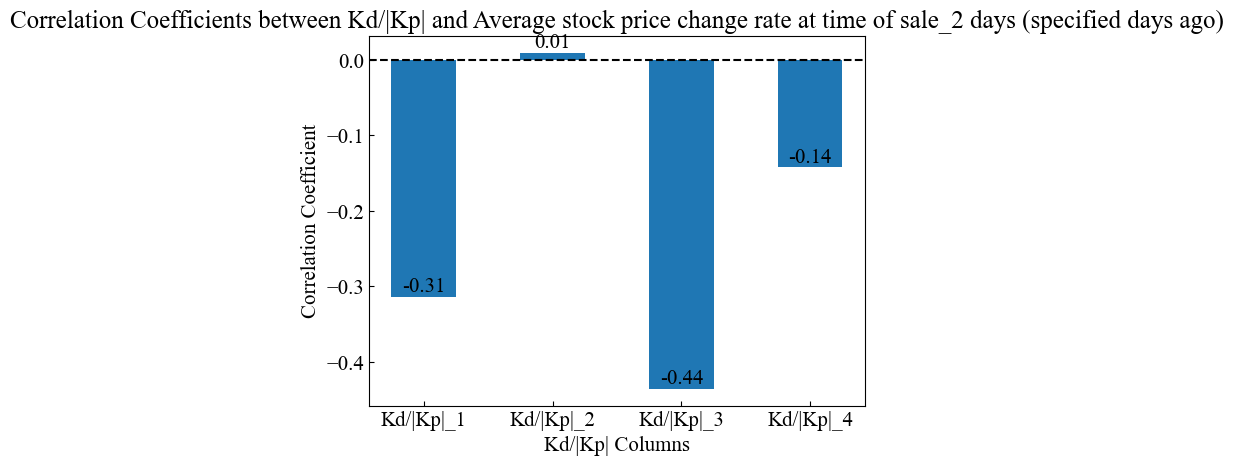

In [20]:

# 特定の列同士の相関係数を計算
correlation_values = [
    df['Kd/|Kp|_1'].corr(df['Average stock price change rate at time of sale_2 days_1 ago']),
    df['Kd/|Kp|_2'].corr(df['Average stock price change rate at time of sale_2 days_2 ago']),
    df['Kd/|Kp|_3'].corr(df['Average stock price change rate at time of sale_2 days_3 ago']),
    df['Kd/|Kp|_4'].corr(df['Average stock price change rate at time of sale_2 days_4 ago'])
]

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd/|Kp|_1', 'Kd/|Kp|_2', 'Kd/|Kp|_3', 'Kd/|Kp|_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd/|Kp| Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Kd/|Kp| and Average stock price change rate at time of sale_2 days (specified days ago)')

# 画像として保存
plt.savefig('correlation_graph__Kd-|Kp|_and_Ave-stockprice-crate-at-sale_2day.png')
plt.show()


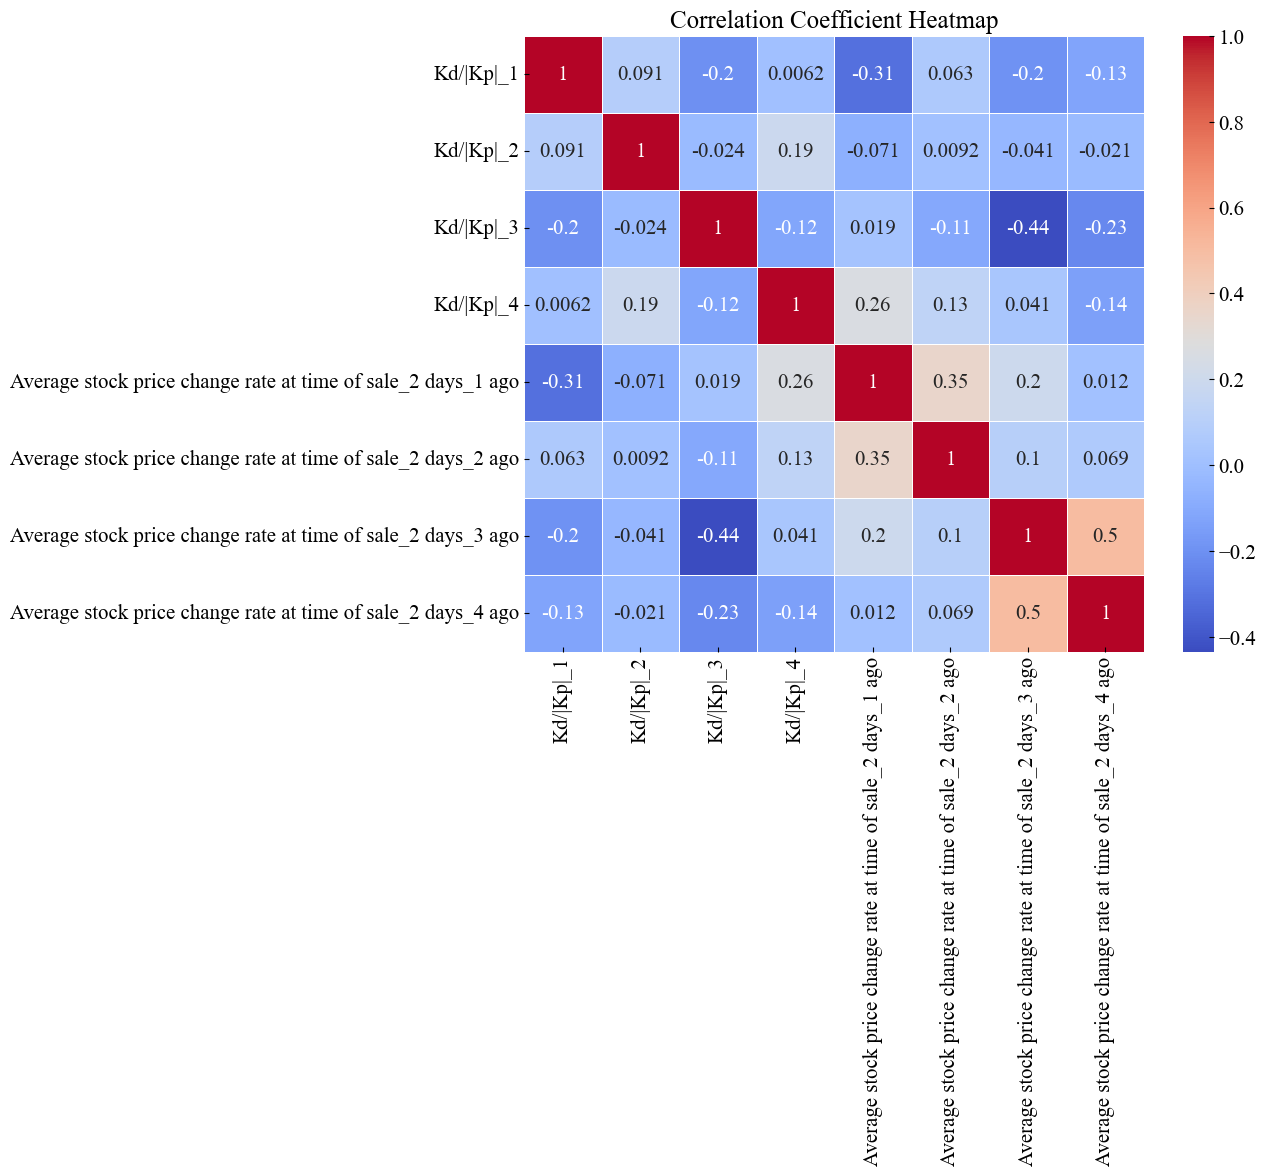

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 相関係数の行列を計算
correlation_matrix = df[['Kd/|Kp|_1', 'Kd/|Kp|_2', 'Kd/|Kp|_3', 'Kd/|Kp|_4', 
                         'Average stock price change rate at time of sale_2 days_1 ago',
                         'Average stock price change rate at time of sale_2 days_2 ago',
                         'Average stock price change rate at time of sale_2 days_3 ago',
                         'Average stock price change rate at time of sale_2 days_4 ago']].corr()

# ヒートマップの作成
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Coefficient Heatmap')
plt.show()


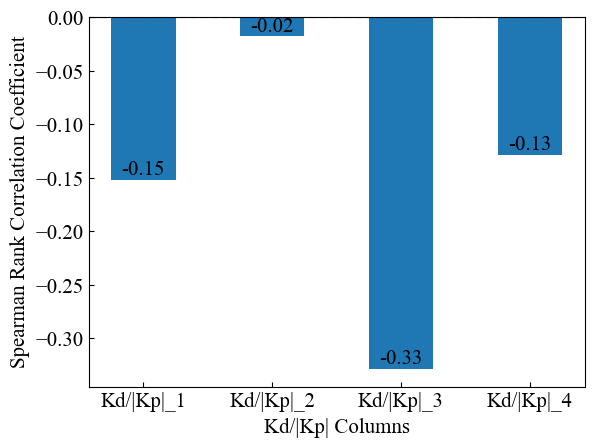

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# スピアマンの順位相関係数の計算
correlation_values, _ = zip(*[
    spearmanr(df['Kd/|Kp|_{}'.format(i)], df['Average stock price change rate at time of sale_2 days_{} ago'.format(i)])
    for i in range(1, 5)
])

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd/|Kp|_1', 'Kd/|Kp|_2', 'Kd/|Kp|_3', 'Kd/|Kp|_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値を各棒の上に表示
for i, value in enumerate(correlation_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Kd/|Kp| Columns')
plt.ylabel('Spearman Rank Correlation Coefficient')
plt.savefig('spearman_correlation_graph_Kd-|Kp|_and_Ave-stockprice-crate-at-sale_2day.png')
plt.show()

Text(0.5, 1.0, 'Spearman Rank Correlation Coefficients between Kd/|Kp| and Average stock price change rate at time of sale_2 days (specified days ago)')

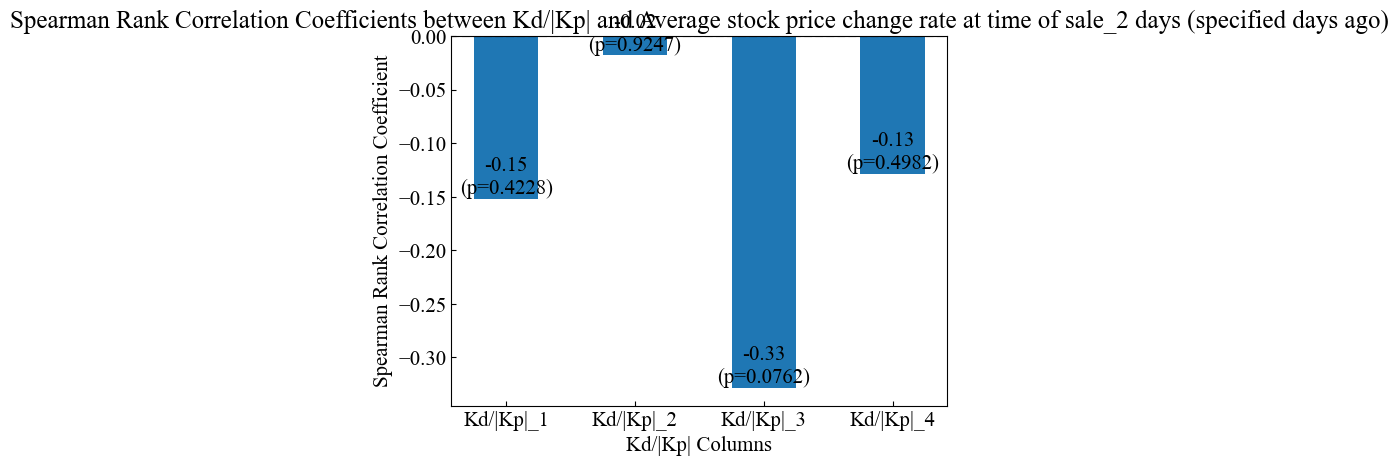

In [24]:

# スピアマンの順位相関係数とp値の計算
correlation_values, p_values = zip(*[
    spearmanr(df['Kd/|Kp|_{}'.format(i)], df['Average stock price change rate at time of sale_2 days_{} ago'.format(i)])
    for i in range(1, 5)
])

# グラフの作成（width パラメータで棒の幅を調整）
plt.bar(['Kd/|Kp|_1', 'Kd/|Kp|_2', 'Kd/|Kp|_3', 'Kd/|Kp|_4'], correlation_values, width=0.5)  # width の値を調整

# 0の位置に点線を引く
plt.axhline(y=0, color='black', linestyle='dashed')

# 数値とp値を各棒の上に表示
for i, (value, p_value) in enumerate(zip(correlation_values, p_values)):
    plt.text(i, value, f'{value:.2f}\n(p={p_value:.4f})', ha='center', va='bottom')

plt.xlabel('Kd/|Kp| Columns')
plt.ylabel('Spearman Rank Correlation Coefficient')
plt.title('Spearman Rank Correlation Coefficients between Kd/|Kp| and Average stock price change rate at time of sale_2 days (specified days ago)')

# 画像として保存
#plt.savefig('spearman_correlation_graph_Kd-|Kp|_and_Ave-stockprice-crate-at-sale_2day.png')
#plt.show()


In [ ]:

# 棒グラフの作成
plt.figure(figsize=(10, 6))
bars = plt.bar(df['No'], df['Kp'], color='skyblue')  # ここで色を変更
plt.xlabel('Subject No')
plt.ylabel('Kp')
plt.title('Bar Graph of Kp (Sorted by Kp)')

# グラフを見やすくするためにy軸の0にラインを引く
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.savefig("4th_BarGraph_Of_Kp.png")
plt.show()